<h1>IBM Capstone Project</h1>

<h2> Loading libraries </h2>

In [1]:
!pip install geopandas
!pip install -c pip-forge geopy --yes 
#!conda install -c conda-forge geopy --yes 
!pip install folium==0.5.0
#!conda install -c conda-forge folium=0.5.0 --yes

     |████████████████████████████████| 972kB 9.4MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 36.4MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 27.0MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 12.7MB/s eta 0:00:01

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes
     |████████████████████████████████| 81kB 6.6MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [2]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import requests
from geopy.geocoders import Nominatim

<h2> Scraping CSV incidents file from Boston police department and copy it to dataframe </h2>

In [3]:
df_crime1=pd.read_csv('https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpj1fj5gff.csv', sep=",")
#df_crime1
df_crime2=df_crime1.dropna(subset=['Lat','Long'])

#select crimes in 2020

df_crime=df_crime2[df_crime2.YEAR>2019]
#df_crime=df_crime[df_crime.MONTH>6]
df_crime=df_crime.loc[df_crime['OFFENSE_CODE']<600]

#df_crime=df_crime.loc[~df_crime['OFFENSE_CODE'].str.startswith('2')]
                       #& (df_crime['OFFENSE_CODE'] == '6$'')]

                        # df[~df['col'].str.startswith('t') & 
      # ~df['col'].str.startswith('c')]
                       
                       #df_crime2.MONTH>6
#df_crime
#gdf_crime = gpd.GeoDataFrame(df_crime, geometry=gpd.points_from_xy(df_crime.Long, df_crime.Lat))

#gdf_crime=gdf_crime(gdf_crime.YEAR=={'2019','2020'})
#df_crime=df_crime.head(1000)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
426633,202489421,520,NaN,BURGLARY - RESIDENTIAL,A7,23,0,2020-07-11 11:36:00,2020,7,Saturday,11,NaN,SARATOGA ST,42.377043,-71.035180,"(42.37704300, -71.03518000)"
426911,202053346,540,NaN,BURGLARY - COMMERICAL,A7,12,0,2020-07-28 02:30:00,2020,7,Tuesday,2,NaN,TRIDENT ST,42.385802,-71.010624,"(42.38580200, -71.01062400)"
426915,202053342,540,NaN,BURGLARY - COMMERICAL,C11,450,0,2020-07-28 06:35:00,2020,7,Tuesday,6,NaN,WASHINGTON ST,42.292129,-71.071757,"(42.29212900, -71.07175700)"
426925,202053330,423,NaN,ASSAULT - AGGRAVATED,B2,282,0,2020-07-28 00:15:00,2020,7,Tuesday,0,NaN,WASHINGTON ST,42.328662,-71.085634,"(42.32866200, -71.08563400)"
426945,202053310,540,NaN,BURGLARY - COMMERICAL,A15,55,0,2020-07-28 00:05:00,2020,7,Tuesday,0,NaN,SCHOOL ST,42.377968,-71.064158,"(42.37796800, -71.06415800)"
426953,202053302,423,NaN,ASSAULT - AGGRAVATED,B3,465,0,2020-07-27 21:54:00,2020,7,Monday,21,NaN,WILCOCK ST,42.286889,-71.092229,"(42.28688900, -71.09222900)"
426958,202053296,423,NaN,ASSAULT - AGGRAVATED,C11,361,0,2020-07-27 21:49:00,2020,7,Monday,21,NaN,MATHER ST,42.293984,-71.065973,"(42.29398400, -71.06597300)"
426983,202053270,423,NaN,ASSAULT - AGGRAVATED,B3,456,1,2020-07-27 20:02:00,2020,7,Monday,20,NaN,FOWLER ST,42.300859,-71.081288,"(42.30085900, -71.08128800)"
426988,202053265,423,NaN,ASSAULT - AGGRAVATED,A15,900,0,2020-07-27 20:00:00,2020,7,Monday,20,NaN,MEDFORD ST,42.379017,-71.054104,"(42.37901700, -71.05410400)"
427022,202053230,301,NaN,ROBBERY,D14,778,0,2020-07-27 03:00:00,2020,7,Monday,3,NaN,WASHINGTON ST,42.349055,-71.150498,"(42.34905500, -71.15049800)"


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

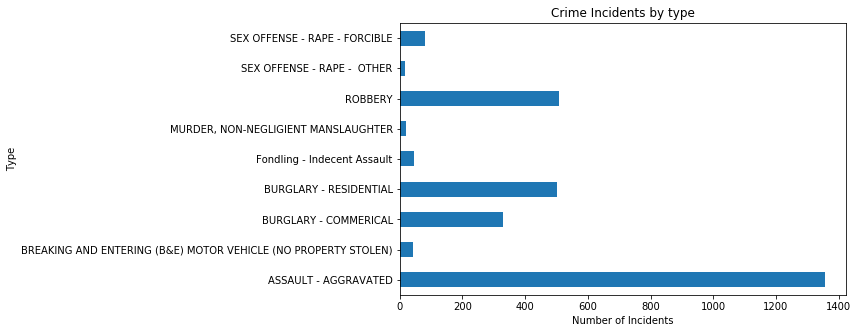

In [6]:
df_crime_chart=df_crime.groupby('OFFENSE_DESCRIPTION').count()

df_crime_chart['INCIDENT_NUMBER'].plot(kind='barh', figsize=(8, 5))

plt.title('Crime Incidents by type') # add a title to the histogram
plt.ylabel('Type') # add y-label
plt.xlabel('Number of Incidents') # add x-label

plt.show()

In [12]:
df_crime_chart

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_DESCRIPTION,,,,,,,,,,,,,,,,
ASSAULT - AGGRAVATED,1356,1356,0,1353,1356,1356,1356,1356,1356,1356,1356,0,1212,1356,1356,1356
BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN),44,44,0,44,44,44,44,44,44,44,44,0,42,44,44,44
BURGLARY - COMMERICAL,328,328,0,328,328,328,328,328,328,328,328,0,324,328,328,328
BURGLARY - RESIDENTIAL,501,501,0,500,501,501,501,501,501,501,501,0,501,501,501,501
Fondling - Indecent Assault,46,46,0,46,46,46,46,46,46,46,46,0,42,46,46,46
"MURDER, NON-NEGLIGIENT MANSLAUGHTER",19,19,0,19,19,19,19,19,19,19,19,0,18,19,19,19
ROBBERY,507,507,0,506,507,507,507,507,507,507,507,0,446,507,507,507
SEX OFFENSE - RAPE - OTHER,16,16,0,16,16,16,16,16,16,16,16,0,16,16,16,16
SEX OFFENSE - RAPE - FORCIBLE,82,82,0,82,82,82,82,82,82,82,82,0,79,82,82,82


In [7]:
def get_zipcode(df_crime, geolocator, Lat, Long):
    location = geolocator.reverse((df_crime[Lat], df_crime[Long]))

#select zip codes using coordinates from crime database using geolocator Nominatim
    try: 
        return location.raw['address']['postcode']
    except KeyError:
        return None
geolocator = Nominatim(user_agent="my-application")
geolocator
pd.set_option('display.max_colwidth', -1)
zipcodes = df_crime.apply(get_zipcode, axis=1, geolocator=geolocator, Lat='Lat', Long='Long')
zipcodes

426633    02128     
426911    02150     
426915    02124     
426925    02119     
426945    02129     
426953    02126     
426958    01210     
426983    02121     
426988    02129     
427022    02135-3202
427039    02118     
427054    02119     
427088    02203     
427097    02126     
427116    02215     
427117    01125     
427125    02119     
427139    02111     
427162    02115     
427171    02119     
427177    01125     
427189    02111     
427195    02111     
427199    02126     
427201    02111     
427202    02128     
427223    02116     
427225    02131-3025
427241    02126     
427245    02134     
          ...       
476007    01125     
476017    02125     
476021    02133     
476065    02115     
476100    02114     
476121    02137     
476148    02435     
476198    02121     
476209    02109     
476221    02122     
476229    02109     
476238    02109     
476250    02124     
476265    None      
476273    02212     
476274    02136     
476306    021

In [92]:
# convert to dataframe
df_zipcodes = pd.DataFrame(zipcodes,columns=['zip'])
df_zipcodes

,zip
426633,02128
426911,02150
426915,02124
426925,02119
426945,02129
426953,02126
426958,01210
426983,02121
426988,02129
427022,02135-3202


In [106]:
#cut zipocode to 4 digits
df_zipcodes1=df_zipcodes['zip'].str[1:5]
#add zipcode to crime_dataframe
df_crime_zip2=df_crime.join(df_zipcodes1)
df_crime_zip3=df_crime_zip2.dropna(subset=['zip'])
df_crime_zip3

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,zip
426633,202489421,520,NaN,BURGLARY - RESIDENTIAL,A7,23,0,2020-07-11 11:36:00,2020,7,Saturday,11,NaN,SARATOGA ST,42.377043,-71.035180,"(42.37704300, -71.03518000)",2128
426911,202053346,540,NaN,BURGLARY - COMMERICAL,A7,12,0,2020-07-28 02:30:00,2020,7,Tuesday,2,NaN,TRIDENT ST,42.385802,-71.010624,"(42.38580200, -71.01062400)",2150
426915,202053342,540,NaN,BURGLARY - COMMERICAL,C11,450,0,2020-07-28 06:35:00,2020,7,Tuesday,6,NaN,WASHINGTON ST,42.292129,-71.071757,"(42.29212900, -71.07175700)",2124
426925,202053330,423,NaN,ASSAULT - AGGRAVATED,B2,282,0,2020-07-28 00:15:00,2020,7,Tuesday,0,NaN,WASHINGTON ST,42.328662,-71.085634,"(42.32866200, -71.08563400)",2119
426945,202053310,540,NaN,BURGLARY - COMMERICAL,A15,55,0,2020-07-28 00:05:00,2020,7,Tuesday,0,NaN,SCHOOL ST,42.377968,-71.064158,"(42.37796800, -71.06415800)",2129
426953,202053302,423,NaN,ASSAULT - AGGRAVATED,B3,465,0,2020-07-27 21:54:00,2020,7,Monday,21,NaN,WILCOCK ST,42.286889,-71.092229,"(42.28688900, -71.09222900)",2126
426958,202053296,423,NaN,ASSAULT - AGGRAVATED,C11,361,0,2020-07-27 21:49:00,2020,7,Monday,21,NaN,MATHER ST,42.293984,-71.065973,"(42.29398400, -71.06597300)",1210
426983,202053270,423,NaN,ASSAULT - AGGRAVATED,B3,456,1,2020-07-27 20:02:00,2020,7,Monday,20,NaN,FOWLER ST,42.300859,-71.081288,"(42.30085900, -71.08128800)",2121
426988,202053265,423,NaN,ASSAULT - AGGRAVATED,A15,900,0,2020-07-27 20:00:00,2020,7,Monday,20,NaN,MEDFORD ST,42.379017,-71.054104,"(42.37901700, -71.05410400)",2129
427022,202053230,301,NaN,ROBBERY,D14,778,0,2020-07-27 03:00:00,2020,7,Monday,3,NaN,WASHINGTON ST,42.349055,-71.150498,"(42.34905500, -71.15049800)",2135


In [107]:
#calulate number of crimes per zipcode
df_crime_zip3.groupby('zip').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
zip,,,,,,,,,,,,,,,,,
1125,60,60,0,60,60,60,60,60,60,60,60,60,0,57,60,60,60
1210,60,60,0,60,60,60,60,60,60,60,60,60,0,59,60,60,60
2026,5,5,0,5,5,5,5,5,5,5,5,5,0,5,5,5,5
2102,3,3,0,3,3,3,3,3,3,3,3,3,0,3,3,3,3
2107,8,8,0,8,8,8,8,8,8,8,8,8,0,8,8,8,8
2108,18,18,0,18,18,18,18,18,18,18,18,18,0,15,18,18,18
2109,13,13,0,13,13,13,13,13,13,13,13,13,0,11,13,13,13
2110,28,28,0,28,28,28,28,28,28,28,28,28,0,26,28,28,28
2111,68,68,0,68,68,68,68,68,68,68,68,68,0,65,68,68,68


<h2> Load zipcodes of Boston from json file from US zip database and copy it to dataframe </h2>

In [27]:
#laod json file
df_json_zip1 = gpd.read_file('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=geojson&q=boston&timezone=Europe/Berlin&lang=en')
df_json_zip=df_json_zip1[df_json_zip1.state=='MA']
# prepare data to required format
df_coord=df_json_zip[['zip','longitude','latitude']]
df_coord.reset_index(drop=True,inplace=True)
df_coord=df_coord.rename(columns={'zip': 'Postal Code', 'longitude': 'Longitude','latitude': 'Latitude'})
#correct wrong zipcode coordinates
df_coord.loc[13, 'Longitude'] = -71.0600
df_coord.loc[13, 'Latitude'] = 42.3600
df_coord

,Postal Code,Longitude,Latitude
0,02196,-70.919635,42.338947
1,02283,-70.919635,42.338947
2,02201,-70.919635,42.338947
3,02211,-70.919635,42.338947
4,02111,-71.061010,42.349838
5,02103,-70.919635,42.338947
6,02202,-71.061814,42.361094
7,02209,-70.919635,42.338947
8,02110,-71.053650,42.356532
9,02121,-71.081270,42.307448


<h2> Explore and cluster the neighborhoods in Boston </h2>

In [28]:
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('1')
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
print('2')   
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print('3')
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library



1
2
3


### Define Foursquare Credentials and Version

In [29]:
CLIENT_ID = '0ZJ5KJXTGGPPXZYLIZ34QTAU4M0RZC53LKYOYLT2ZY4DZ2S1' # your Foursquare ID
CLIENT_SECRET = 'RNILRAIRI5ETZGSDGVQTV0CKXPV4OS5YRWN0THXCBIGCIBMI' # your Foursquare Secret
VERSION = '20200607'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0ZJ5KJXTGGPPXZYLIZ34QTAU4M0RZC53LKYOYLT2ZY4DZ2S1
CLIENT_SECRET:RNILRAIRI5ETZGSDGVQTV0CKXPV4OS5YRWN0THXCBIGCIBMI


In [30]:
# finding geographical coordinates of Boston
address = 'Boston, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

42.3602534 -71.0582912


### Create a map of Boston with neighborhoods superimposed on top.

In [31]:
# create map of Boston using latitude and longitude values
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)

#limit to the number of disctricts with Boston in the name
#df_boston = df_boston[df_boston['Borough'].str.contains('Boston',regex=False)]

# add markers to map
for lat, lng, PC in zip(df_coord['Latitude'], df_coord['Longitude'], df_coord['Postal Code']):
    label = '{}'.format(PC)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
    
map_boston

In [32]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0ZJ5KJXTGGPPXZYLIZ34QTAU4M0RZC53LKYOYLT2ZY4DZ2S1&client_secret=RNILRAIRI5ETZGSDGVQTV0CKXPV4OS5YRWN0THXCBIGCIBMI&v=20200607&ll=42.3602534,-71.0582912&radius=500&limit=100'

In [33]:
#request json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f29a000a77aef7f1d609589'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Boston',
  'headerFullLocation': 'Downtown Boston, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 119,
  'suggestedBounds': {'ne': {'lat': 42.3647534045, 'lng': -71.05221261957064},
   'sw': {'lat': 42.355753395499995, 'lng': -71.06436978042936}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b3d563ff964a520a49225e3',
       'name': 'Faneuil Hall Marketplace',
       'location': {'address': '1 S Market St',
        'crossStreet': 'at Congress St & North St',
        'lat': 42.359977505576424,


In [34]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the json and structure it into a pandas dataframe

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Faneuil Hall Marketplace,Historic Site,42.359978,-71.056410
1,Boston Public Market,Market,42.361950,-71.057466
2,Saus Restaurant,Belgian Restaurant,42.361076,-71.057054
3,Red's Best,Seafood Restaurant,42.361960,-71.057587
4,Tatte Bakery & Cafe,Bakery,42.358451,-71.057981


In [36]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


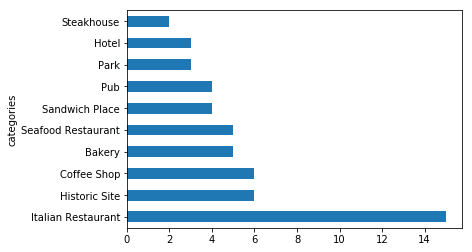

In [45]:
nearby_venues_chart=nearby_venues.groupby('categories').count()


nearby_venues_chart

nearby_venues_chart.sort_values('name',ascending=False,inplace=True)
nearby_venues_chart_10=(nearby_venues_chart.head(10))

nearby_venues_chart_10['name'].plot(kind='barh')

#plt.title('Top 10 Venues') # add a title to the histogram
#plt.ylabel('Venue Type') # add y-label
#plt.xlabel('Number of venues') # add x-label

#plt.show()

## Analyze Neiborhoods

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
boston_venues = getNearbyVenues(names=df_coord['Postal Code'],
                                   latitudes=df_coord['Latitude'],
                                   longitudes=df_coord['Longitude']
                                  )
boston_venues.head()

02196
02283
02201
02211
02111
02103
02202
02209
02110
02121
02113
02108
02112
02122
02215
02208
02109
02119
02293
02205
02222
02105
02107
02216
02120
02125
02266
02284
02217
02241
02204
02102
02118
02116
02115
02123
02106
02199
02210
02297
02212
02206
02203
02104
02128
02295
02101
02133
02117
02127
02114
02163
02124
02207


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,02111,42.349838,-71.06101,Shabu Zen,42.350922,-71.060942,Asian Restaurant
1,02111,42.349838,-71.06101,Shojo,42.351028,-71.060736,Asian Restaurant
2,02111,42.349838,-71.06101,Crave - Mad for Chicken,42.350378,-71.060786,Korean Restaurant
3,02111,42.349838,-71.06101,Hostelling International Boston,42.351084,-71.063398,Hostel
4,02111,42.349838,-71.06101,Double Chin,42.350739,-71.061523,Asian Restaurant


In [54]:
print(boston_venues.shape)

(1616, 7)


In [55]:
boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
02101,18,18,18,18,18,18
02106,100,100,100,100,100,100
02108,86,86,86,86,86,86
02109,100,100,100,100,100,100
02110,76,76,76,76,76,76
02111,100,100,100,100,100,100
02113,86,86,86,86,86,86
02114,44,44,44,44,44,44
02115,32,32,32,32,32,32


In [56]:
# find unique categories
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))
boston_venues.groupby('Venue Category').count()


There are 206 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,4,4,4,4,4,4
African Restaurant,3,3,3,3,3,3
Airport,2,2,2,2,2,2
Airport Terminal,2,2,2,2,2,2
American Restaurant,46,46,46,46,46,46
Aquarium,4,4,4,4,4,4
Arepa Restaurant,2,2,2,2,2,2
Art Gallery,4,4,4,4,4,4
Art Museum,5,5,5,5,5,5


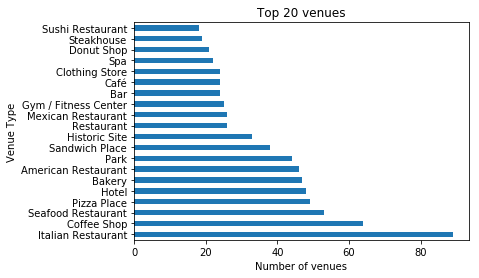

In [61]:
boston_venues_chart=boston_venues.groupby('Venue Category').count()


boston_venues_chart

boston_venues_chart.sort_values('Neighborhood',ascending=False,inplace=True)
boston_venues_chart_10=(boston_venues_chart.head(20))

boston_venues_chart_10['Neighborhood'].plot(kind='barh')

plt.title('Top 20 venues') # add a title to the histogram
plt.ylabel('Venue Type') # add y-label
plt.xlabel('Number of venues') # add x-label

plt.show()

## Analyze Each Neighborhood

In [184]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot

,Yoga Studio,Accessories Store,African Restaurant,Airport,Airport Terminal,American Restaurant,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,...,Tourist Information Center,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
boston_onehot.shape

(1627, 205)

In [186]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,Airport,Airport Terminal,American Restaurant,Aquarium,Arepa Restaurant,Art Gallery,...,Tourist Information Center,Track,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,02101,0.000000,0.00,0.000000,0.055556,0.111111,0.055556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,02106,0.000000,0.02,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.02
2,02108,0.011628,0.00,0.000000,0.000000,0.000000,0.034884,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.00
3,02109,0.010000,0.00,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,...,0.020000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00
4,02110,0.000000,0.00,0.000000,0.000000,0.000000,0.026316,0.039474,0.000000,0.000000,...,0.013158,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.013158,0.00
5,02111,0.010000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.00
6,02113,0.011628,0.00,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,02114,0.022727,0.00,0.000000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,02115,0.000000,0.00,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,02116,0.000000,0.01,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.03


In [187]:
boston_grouped.shape

(28, 205)

### print each neighborhood along with the top 5 most common venues

In [188]:
num_top_venues = 5

for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----02101----
                 venue  freq
0  Rental Car Location  0.33
1  Airport Terminal     0.11
2  Hotel                0.11
3  Baseball Field       0.06
4  Gym                  0.06


----02106----
            venue  freq
0  Clothing Store  0.08
1  Spa             0.07
2  Hotel           0.04
3  Jewelry Store   0.04
4  Coffee Shop     0.03


----02108----
                 venue  freq
0  Coffee Shop          0.06
1  Restaurant           0.05
2  Pizza Place          0.05
3  Italian Restaurant   0.03
4  American Restaurant  0.03


----02109----
                venue  freq
0  Italian Restaurant  0.22
1  Seafood Restaurant  0.10
2  Bakery              0.06
3  Park                0.04
4  Historic Site       0.04


----02110----
                venue  freq
0  Boat or Ferry       0.12
1  Seafood Restaurant  0.07
2  Historic Site       0.05
3  Park                0.05
4  Asian Restaurant    0.04


----02111----
                venue  freq
0  Chinese Restaurant  0.13
1  Bakery             

### Create pandas dataframe

In [189]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [199]:
#dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,02101,Rental Car Location,Hotel,Airport Terminal,Baseball Field,Donut Shop,Gym,Park,Café,American Restaurant,Airport
1,02106,Clothing Store,Spa,Jewelry Store,Hotel,Cosmetics Shop,Coffee Shop,Boutique,American Restaurant,Gym / Fitness Center,Breakfast Spot
2,02108,Coffee Shop,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
3,02109,Italian Restaurant,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
4,02110,Boat or Ferry,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
5,02111,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
6,02113,Italian Restaurant,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
7,02114,Hotel Bar,American Restaurant,Food Truck,History Museum,Pizza Place,Playground,Italian Restaurant,Gourmet Shop,Restaurant,Bistro
8,02115,Pizza Place,Art Museum,Coffee Shop,Garden,Sandwich Place,Korean Restaurant,Baseball Field,Lounge,Middle Eastern Restaurant,Burger Joint
9,02116,Spa,American Restaurant,Seafood Restaurant,Italian Restaurant,Gym,Women's Store,Clothing Store,Sandwich Place,Gym / Fitness Center,Cosmetics Shop


## Cluster Neighborhoods

In [200]:
#Run k-means to cluster the neighborhood into 5 clusters
# import k-means from clustering stage
from sklearn.cluster import KMeans

kclusters = 5

boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [201]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
df_coord=df_coord.rename(columns={'Postal Code': 'Neighborhood'})

boston_merged = df_coord
#boston_merged 
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
boston_merged=boston_merged.dropna(subset=['Cluster Labels'])
boston_merged

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,02111,-71.061010,42.349838,1.0,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
4,02202,-71.061814,42.361094,1.0,Historic Site,Hotel,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Bar,Bakery,Restaurant,American Restaurant,Sandwich Place
6,02109,-71.054170,42.361477,1.0,Italian Restaurant,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
7,02119,-71.084550,42.324511,2.0,American Restaurant,Park,Convenience Store,BBQ Joint,African Restaurant,Fast Food Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Farmers Market
9,02110,-71.053650,42.356532,1.0,Boat or Ferry,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
10,02121,-71.081270,42.307448,1.0,Fast Food Restaurant,Shopping Mall,Pharmacy,Nightclub,Fish & Chips Shop,Men's Store,Farmers Market,Supermarket,Caribbean Restaurant,Donut Shop
11,02113,-71.056360,42.365028,1.0,Italian Restaurant,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
12,02108,-71.064080,42.357903,1.0,Coffee Shop,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
13,02212,-71.060000,42.360000,1.0,Seafood Restaurant,Coffee Shop,Historic Site,Sandwich Place,Italian Restaurant,Bakery,New American Restaurant,Restaurant,American Restaurant,Hotel
15,02203,-71.060364,42.361485,1.0,Italian Restaurant,Historic Site,Seafood Restaurant,Bakery,Coffee Shop,Hotel,Sandwich Place,Park,Salad Place,Pub


In [202]:
#convert Clsuter Labels to Int type
pd.options.mode.chained_assignment = None 
boston_merged['Cluster Labels'] = boston_merged['Cluster Labels'].astype(int)
boston_merged

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,02111,-71.061010,42.349838,1,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
4,02202,-71.061814,42.361094,1,Historic Site,Hotel,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Bar,Bakery,Restaurant,American Restaurant,Sandwich Place
6,02109,-71.054170,42.361477,1,Italian Restaurant,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
7,02119,-71.084550,42.324511,2,American Restaurant,Park,Convenience Store,BBQ Joint,African Restaurant,Fast Food Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Farmers Market
9,02110,-71.053650,42.356532,1,Boat or Ferry,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
10,02121,-71.081270,42.307448,1,Fast Food Restaurant,Shopping Mall,Pharmacy,Nightclub,Fish & Chips Shop,Men's Store,Farmers Market,Supermarket,Caribbean Restaurant,Donut Shop
11,02113,-71.056360,42.365028,1,Italian Restaurant,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
12,02108,-71.064080,42.357903,1,Coffee Shop,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
13,02212,-71.060000,42.360000,1,Seafood Restaurant,Coffee Shop,Historic Site,Sandwich Place,Italian Restaurant,Bakery,New American Restaurant,Restaurant,American Restaurant,Hotel
15,02203,-71.060364,42.361485,1,Italian Restaurant,Historic Site,Seafood Restaurant,Bakery,Coffee Shop,Hotel,Sandwich Place,Park,Salad Place,Pub


### visualize the resulting clusters

In [203]:
boston_merged

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,02111,-71.061010,42.349838,1,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
4,02202,-71.061814,42.361094,1,Historic Site,Hotel,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Bar,Bakery,Restaurant,American Restaurant,Sandwich Place
6,02109,-71.054170,42.361477,1,Italian Restaurant,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
7,02119,-71.084550,42.324511,2,American Restaurant,Park,Convenience Store,BBQ Joint,African Restaurant,Fast Food Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Farmers Market
9,02110,-71.053650,42.356532,1,Boat or Ferry,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
10,02121,-71.081270,42.307448,1,Fast Food Restaurant,Shopping Mall,Pharmacy,Nightclub,Fish & Chips Shop,Men's Store,Farmers Market,Supermarket,Caribbean Restaurant,Donut Shop
11,02113,-71.056360,42.365028,1,Italian Restaurant,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
12,02108,-71.064080,42.357903,1,Coffee Shop,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
13,02212,-71.060000,42.360000,1,Seafood Restaurant,Coffee Shop,Historic Site,Sandwich Place,Italian Restaurant,Bakery,New American Restaurant,Restaurant,American Restaurant,Hotel
15,02203,-71.060364,42.361485,1,Italian Restaurant,Historic Site,Seafood Restaurant,Bakery,Coffee Shop,Hotel,Sandwich Place,Park,Salad Place,Pub


In [210]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 0

In [205]:
boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,02122,Pet Store,Donut Shop,Liquor Store,Dog Run,Sandwich Place,Arts & Crafts Store,Chinese Restaurant,Bank,Seafood Restaurant
24,02125,Pub,Bar,Pizza Place,Caribbean Restaurant,Fried Chicken Joint,Deli / Bodega,Yoga Studio,Pharmacy,Convenience Store
27,02120,Pizza Place,Sushi Restaurant,Liquor Store,New American Restaurant,Gym,Furniture / Home Store,Burger Joint,Art Gallery,Convenience Store
52,02127,Bowling Alley,Convenience Store,Sports Bar,Pizza Place,Cosmetics Shop,Juice Bar,Dive Bar,Liquor Store,New American Restaurant


### Cluster 1

In [206]:
boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,02111,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
4,02202,Hotel,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Bar,Bakery,Restaurant,American Restaurant,Sandwich Place
6,02109,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
9,02110,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
10,02121,Shopping Mall,Pharmacy,Nightclub,Fish & Chips Shop,Men's Store,Farmers Market,Supermarket,Caribbean Restaurant,Donut Shop
11,02113,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
12,02108,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
13,02212,Coffee Shop,Historic Site,Sandwich Place,Italian Restaurant,Bakery,New American Restaurant,Restaurant,American Restaurant,Hotel
15,02203,Historic Site,Seafood Restaurant,Bakery,Coffee Shop,Hotel,Sandwich Place,Park,Salad Place,Pub
17,02128,Chinese Restaurant,Brazilian Restaurant,Metro Station,Liquor Store,Latin American Restaurant,Plaza,Mexican Restaurant,Donut Shop,Diner


### Cluster 2

In [207]:
boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,02119,Park,Convenience Store,BBQ Joint,African Restaurant,Fast Food Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Farmers Market


### Cluster 3

In [208]:
boston_merged.loc[boston_merged['Cluster Labels'] == 3, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,02124,Caribbean Restaurant,Park,Gym / Fitness Center,Liquor Store,Restaurant,Grocery Store,Diner,Farmers Market,Fast Food Restaurant


### Cluster 4

In [209]:
boston_merged.loc[boston_merged['Cluster Labels'] == 4, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,02101,Hotel,Airport Terminal,Baseball Field,Donut Shop,Gym,Park,Café,American Restaurant,Airport


In [212]:
boston_merged

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,02111,-71.061010,42.349838,1,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Sushi Restaurant,Bubble Tea Shop,Café,Coffee Shop,Hotel Bar,Performing Arts Venue
4,02202,-71.061814,42.361094,1,Historic Site,Hotel,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Bar,Bakery,Restaurant,American Restaurant,Sandwich Place
6,02109,-71.054170,42.361477,1,Italian Restaurant,Seafood Restaurant,Bakery,Historic Site,Park,Café,Pizza Place,Coffee Shop,Hotel,Sandwich Place
7,02119,-71.084550,42.324511,2,American Restaurant,Park,Convenience Store,BBQ Joint,African Restaurant,Fast Food Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Farmers Market
9,02110,-71.053650,42.356532,1,Boat or Ferry,Seafood Restaurant,Historic Site,Park,Coffee Shop,Salad Place,Harbor / Marina,Burger Joint,Steakhouse,Asian Restaurant
10,02121,-71.081270,42.307448,1,Fast Food Restaurant,Shopping Mall,Pharmacy,Nightclub,Fish & Chips Shop,Men's Store,Farmers Market,Supermarket,Caribbean Restaurant,Donut Shop
11,02113,-71.056360,42.365028,1,Italian Restaurant,Pizza Place,Park,Coffee Shop,Seafood Restaurant,Hotel,Café,Sandwich Place,Outdoor Sculpture,Mexican Restaurant
12,02108,-71.064080,42.357903,1,Coffee Shop,Restaurant,Pizza Place,Italian Restaurant,New American Restaurant,American Restaurant,Historic Site,Falafel Restaurant,Plaza,Steakhouse
13,02212,-71.060000,42.360000,1,Seafood Restaurant,Coffee Shop,Historic Site,Sandwich Place,Italian Restaurant,Bakery,New American Restaurant,Restaurant,American Restaurant,Hotel
15,02203,-71.060364,42.361485,1,Italian Restaurant,Historic Site,Seafood Restaurant,Bakery,Coffee Shop,Hotel,Sandwich Place,Park,Salad Place,Pub


### Atractive loactions

In [253]:
#select potential attractive locations
boston_merged_top=boston_merged.loc[boston_merged['Neighborhood'].isin(['02205','02113','02210','02106','02222','02163','02109','02108','02202','02110','02215','02114','02199','02203','02116','02111'])]


In [254]:
#draw map with atractive locations
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged_top['Latitude'], boston_merged_top['Longitude'], boston_merged_top['Neighborhood'], boston_merged_top['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [8]:
#read analysys for scatter plot was saved in csv due to slow coordinates retrieve by Nominatim
SC_df = pd.read_html("https://github.com/Alexander-il/github-example/blob/master/SC.csv")[0]

In [10]:
x = SC_df['Crime']    # year on x-axis
y = SC_df['Venues']    # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-0.20933468, 72.71010559])

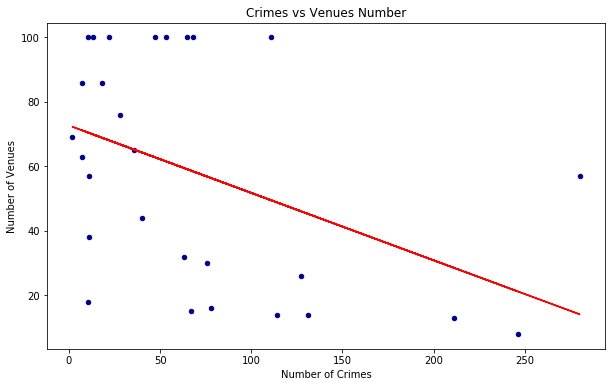

'No. Immigrants = -0 * Year + 73'

In [11]:
SC_df.plot(kind='scatter', x='Crime', y='Venues', figsize=(10, 6), color='darkblue')

plt.title('Crimes vs Venues Number')
plt.xlabel('Number of Crimes')
plt.ylabel('Number of Venues')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(0, 0))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

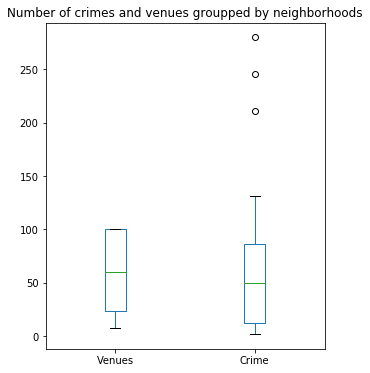

In [13]:

SC_df[{'Crime','Venues'}].plot(kind='box', figsize=(5, 6))

plt.title('Number of crimes and venues groupped by neighborhoods')
plt.show()